# 

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('dataset.csv')

In [2]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.drop(columns=['Unnamed: 0','track_id'], inplace=True, errors='ignore')
df = df.dropna()
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
print("Общая информация о наборе данных:")
df.info()

print("\nСтатистическое описание числовых признаков:")
print(df.describe())

Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  floa

In [5]:
missing_values = df.isnull().sum()
print("\nПропущенные значения по столбцам:")
print(missing_values[missing_values > 0])



Пропущенные значения по столбцам:
Series([], dtype: int64)


<Figure size 1600x1200 with 0 Axes>

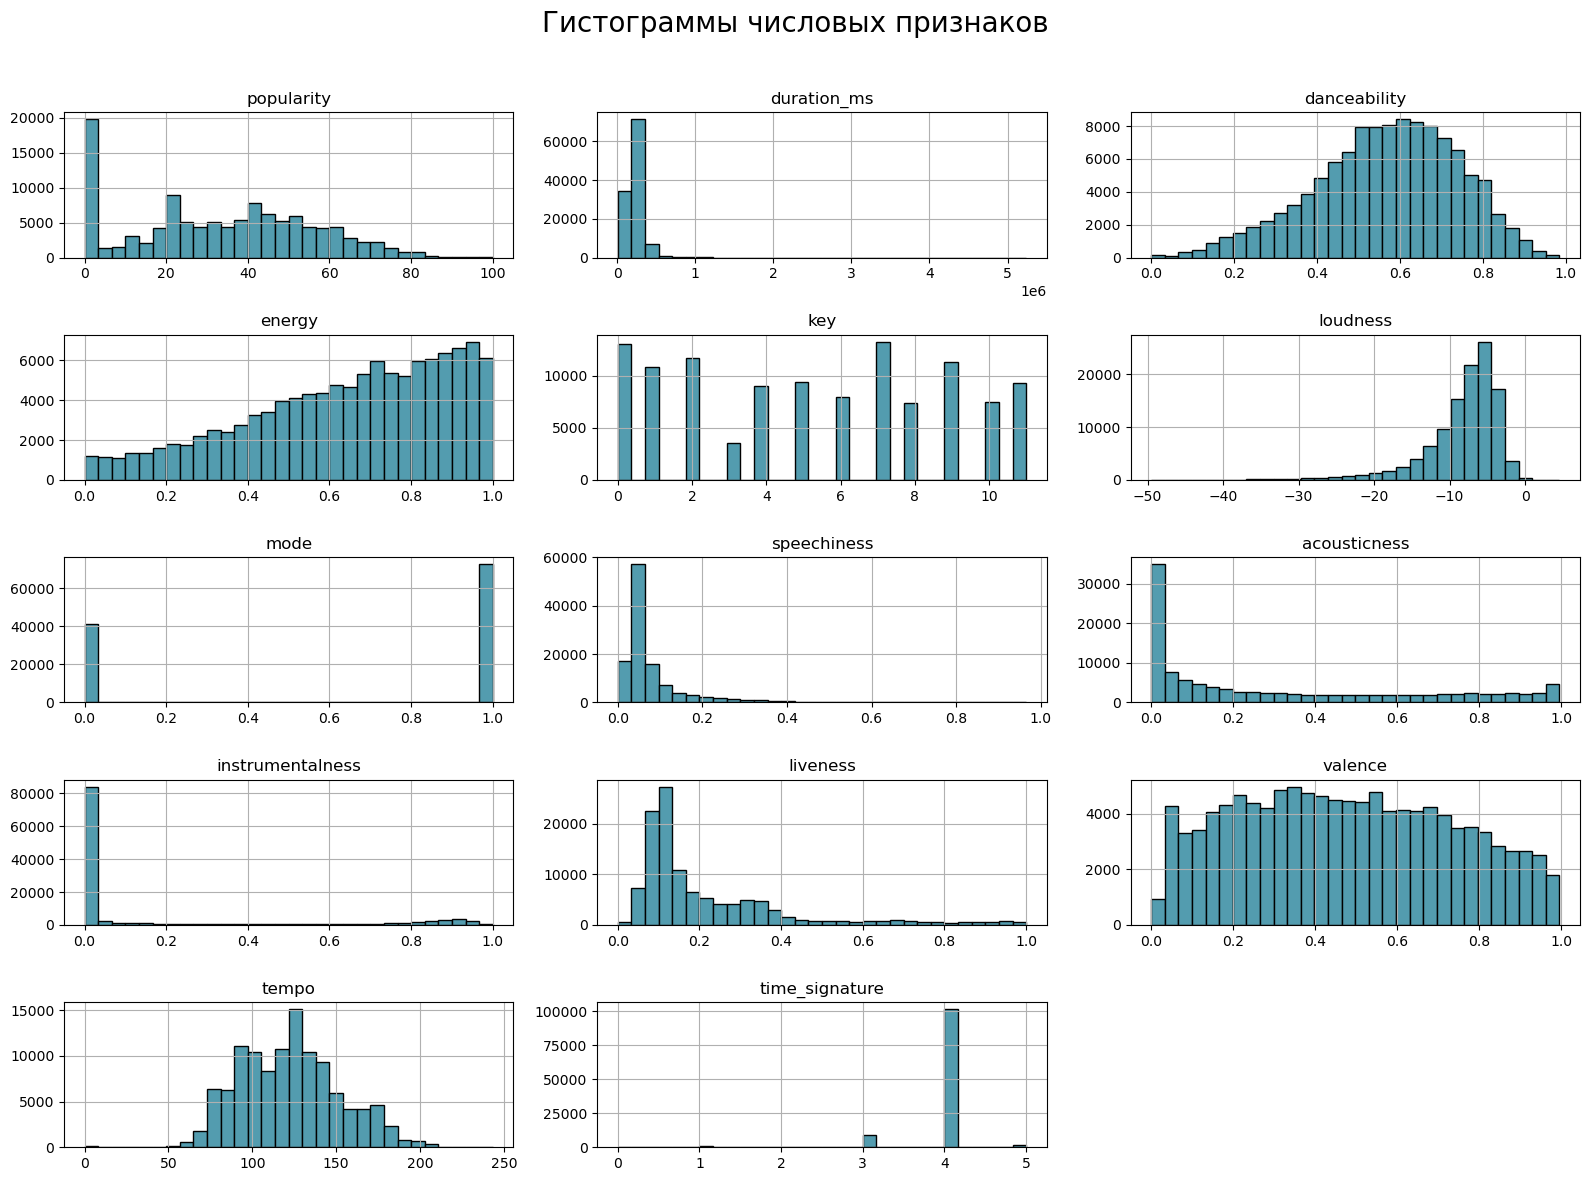

In [6]:
numeric_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 12))

df[numeric_features].hist(bins=30, figsize=(16, 12), layout=(5, 3), color='#539caf', edgecolor='black')

plt.suptitle('Гистограммы числовых признаков', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Вывод по графику:

    popularity: Большинство треков имеют низкую популярность, что логично, так как хиты составляют меньшую долю от общего числа треков.
    
    duration_ms: Распределение соответствует стандартной продолжительности музыкальных композиций (около 2-5 минут).
    
    danceability: Большинство треков имеют высокую танцевальность (0.6–0.8), что характерно для популярной музыки.
    
    energy: Распределение энергичности треков довольно равномерное, что указывает на разнообразие жанров в датасете.
    
    instrumentalness: Высокая концентрация близко к 0, что означает преобладание вокальных треков.
    
    valence: Равномерное распределение настроения треков, что говорит о разнообразии эмоционального окраса музыки.
    
    tempo: Пики в области 100-140 bpm, что соответствует типичному темпу современной музыки.
    
    time_signature: Преобладание размера такта 4/4, что является стандартом в музыке.


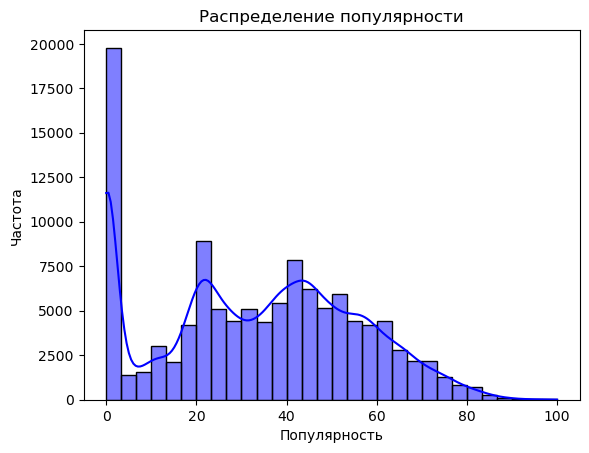

In [7]:
sns.histplot(df['popularity'], kde=True, bins=30, color='blue')
plt.title('Распределение популярности')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

Глядя на график, можно заметить, что большинство треков имеют популярность ниже среднего. Высокий же уровень встречается редко. Мы можем увидить в целом, что данные сбалансированы.

C:\Users\admin\AppData\Local\Temp\ipykernel_33056\1454255139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'duration_min'] = df['duration_ms'] / 60000


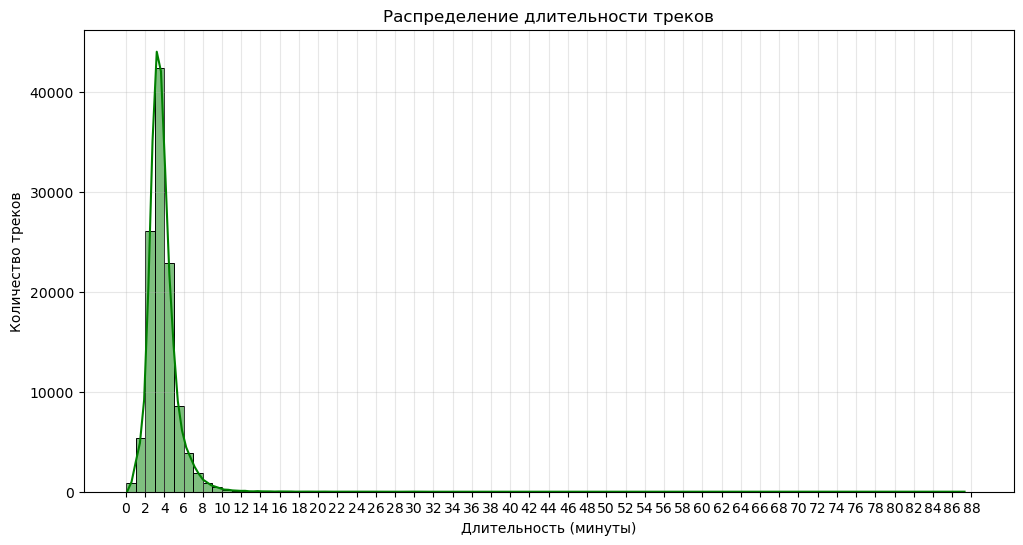


Статистика длительности треков (в минутах):
count    113999.00
mean          3.80
std           1.79
min           0.14
25%           2.90
50%           3.55
75%           4.36
max          87.29
Name: duration_min, dtype: float64

Распределение треков по длительности:
duration_min
0-2 мин     6299
2-3 мин    26136
3-4 мин    42384
4-5 мин    22832
5-6 мин     8592
6+ мин      7756
Name: count, dtype: int64


In [8]:
# Создаем новый столбец с длительностью в минутах
df.loc[:, 'duration_min'] = df['duration_ms'] / 60000

# Находим максимальное и минимальное значение для определения диапазона
min_duration = df['duration_min'].min()
max_duration = df['duration_min'].max()

# Создаем bins с шагом в 1 минуту
bins = np.arange(np.floor(min_duration), np.ceil(max_duration) + 1, 1)

# Строим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration_min', bins=bins, kde=True, color='green')
plt.title('Распределение длительности треков', fontsize=12)
plt.xlabel('Длительность (минуты)', fontsize=10)
plt.ylabel('Количество треков', fontsize=10)

# Устанавливаем метки на оси X с шагом в 1 минуту
plt.xticks(bins[::2])  # Берем каждую вторую метку для лучшей читаемости
plt.grid(True, alpha=0.3)
plt.show()

# Выводим базовую статистику
print("\nСтатистика длительности треков (в минутах):")
print(df['duration_min'].describe().round(2))

# Количество треков в разных временных диапазонах
print("\nРаспределение треков по длительности:")
duration_ranges = pd.cut(df['duration_min'], 
                        bins=[0, 2, 3, 4, 5, 6, float('inf')],
                        labels=['0-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-6 мин', '6+ мин'])
print(duration_ranges.value_counts().sort_index())

Вывел более подробное распределение по трекам, чтобы посмотреть ещё раз, что большая часть треков соответствует стандартной продолжительности музыкальных композиций


Большинство треков длится от 2 до 5 минут.
Средняя длительность составляет около 3.8 минут.
Треки длительностью более 6 минут встречаются реже и могут представлять собой специализированные жанры или живые записи.


C:\Users\admin\AppData\Local\Temp\ipykernel_33056\1521491979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_long_track'] = (df['duration_ms'] > df['duration_ms'].mean()).astype(int)


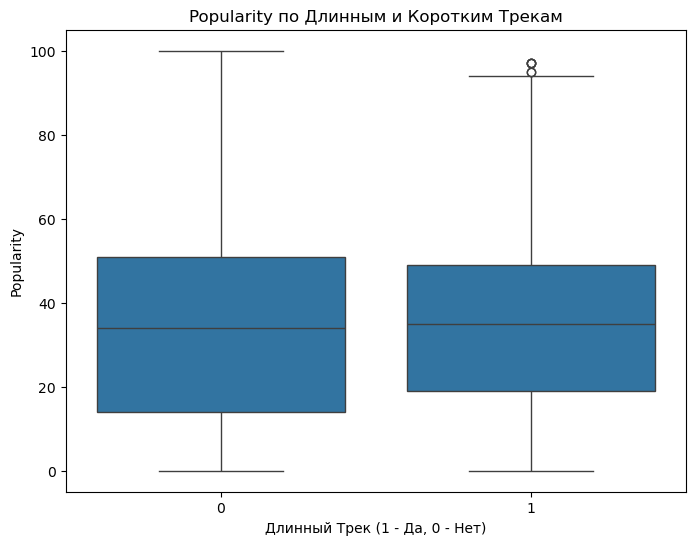

In [9]:
# 5. Бинарный признак длинных треков (is_long_track)
df['is_long_track'] = (df['duration_ms'] > df['duration_ms'].mean()).astype(int)

# Визуализация: Популярность длинных vs коротких треков
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_long_track', y='popularity', data=df)
plt.title('Popularity по Длинным и Коротким Трекам')
plt.xlabel('Длинный Трек (1 - Да, 0 - Нет)')
plt.ylabel('Popularity')
plt.show()



Средняя популярность длинных и коротких треков практически не отличается.
Длительность трека не является существенным фактором, влияющим на популярность.


C:\Users\admin\AppData\Local\Temp\ipykernel_33056\60777065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotional_index'] = df['valence'] * df['energy']


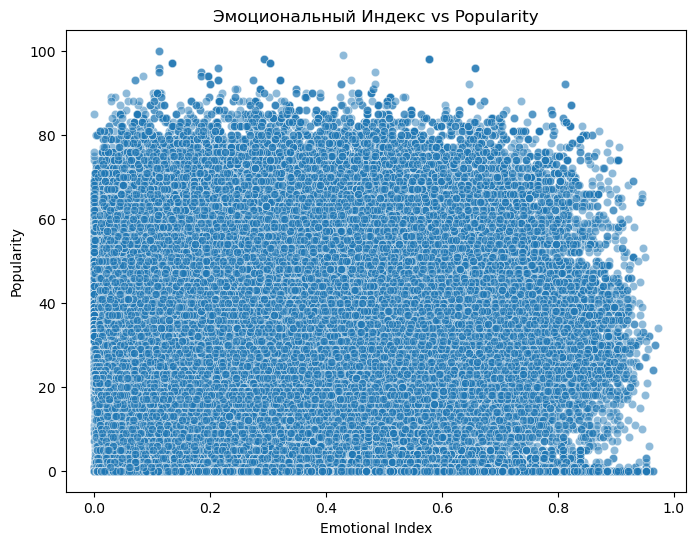

In [10]:
# 4. Эмоциональный индекс (emotional_index)
df['emotional_index'] = df['valence'] * df['energy']

# Визуализация: Взаимосвязь emotional_index и popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='emotional_index', y='popularity', data=df, alpha=0.5)
plt.title('Эмоциональный Индекс vs Popularity')
plt.xlabel('Emotional Index')
plt.ylabel('Popularity')
plt.show()

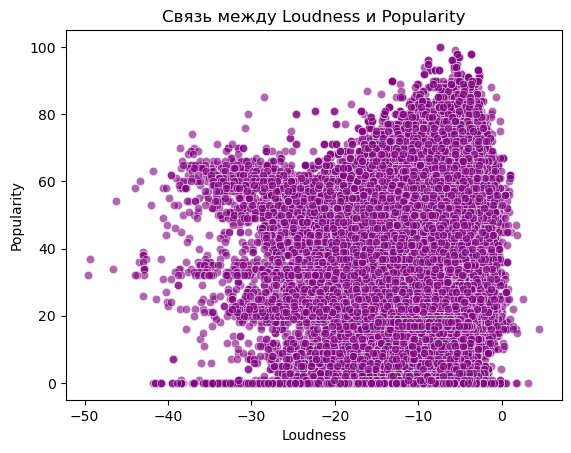

In [11]:
sns.scatterplot(x='loudness', y='popularity', data=df, alpha=0.6, color='purple')
plt.title('Связь между Loudness и Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()


Есть слабая положительная корреляция между громкостью и популярностью трека.
Более громкие треки имеют тенденцию быть более популярными, но зависимость не является сильной.


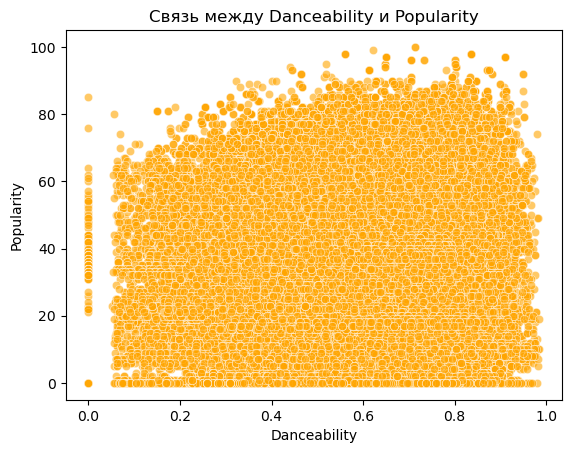

In [12]:
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.6, color='orange')
plt.title('Связь между Danceability и Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()


Наблюдается слабая положительная корреляция.
Более танцевальные треки могут быть чуть более популярными, но зависимость неявная.


C:\Users\admin\AppData\Local\Temp\ipykernel_33056\1934194986.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='track_genre', y='valence', palette="viridis")


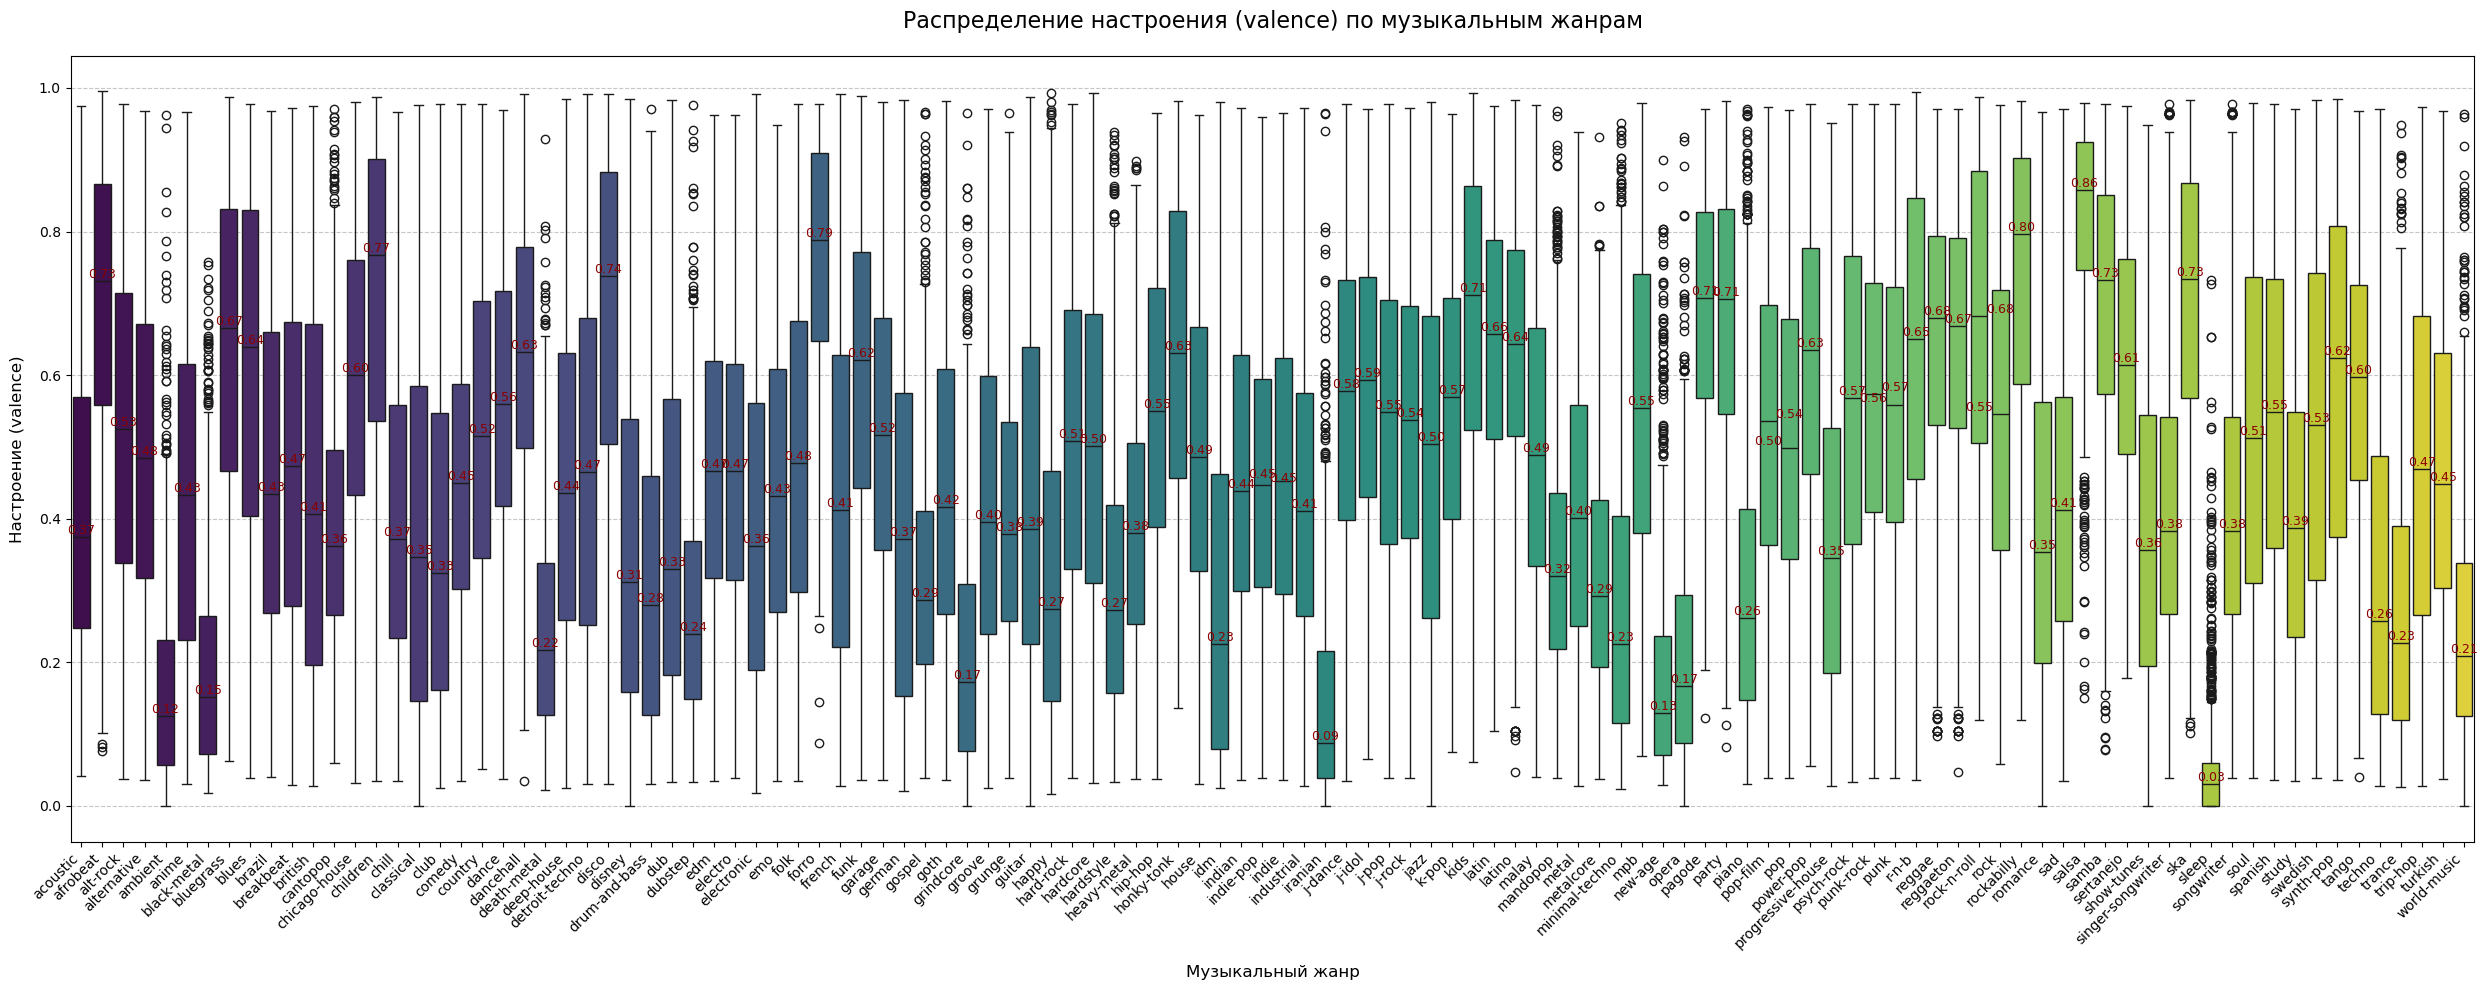

In [13]:
plt.figure(figsize=(25, 10))

sns.boxplot(data=df, x='track_genre', y='valence', palette="viridis")

plt.title("Распределение настроения (valence) по музыкальным жанрам", fontsize=16, pad=20)
plt.xlabel("Музыкальный жанр", fontsize=12, labelpad=10)
plt.ylabel("Настроение (valence)", fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)

medians = df.groupby('track_genre')['valence'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', 
             horizontalalignment='center', verticalalignment='bottom',
             fontsize=9, color='darkred')

plt.tight_layout()
plt.show()

Анализ распределения настроения треков в разных жанрах помогает понять, какие жанры более "веселые" или "грустные".

Жанры значительно различаются по настроению.
Например, жанры с более высоким valence (веселые) могут быть "детские песни" или "поп", а с низким valence (грустные) — "блюз" или "классическая".


Text(0.5, 1.0, 'Средняя инструментальность по жанрам')

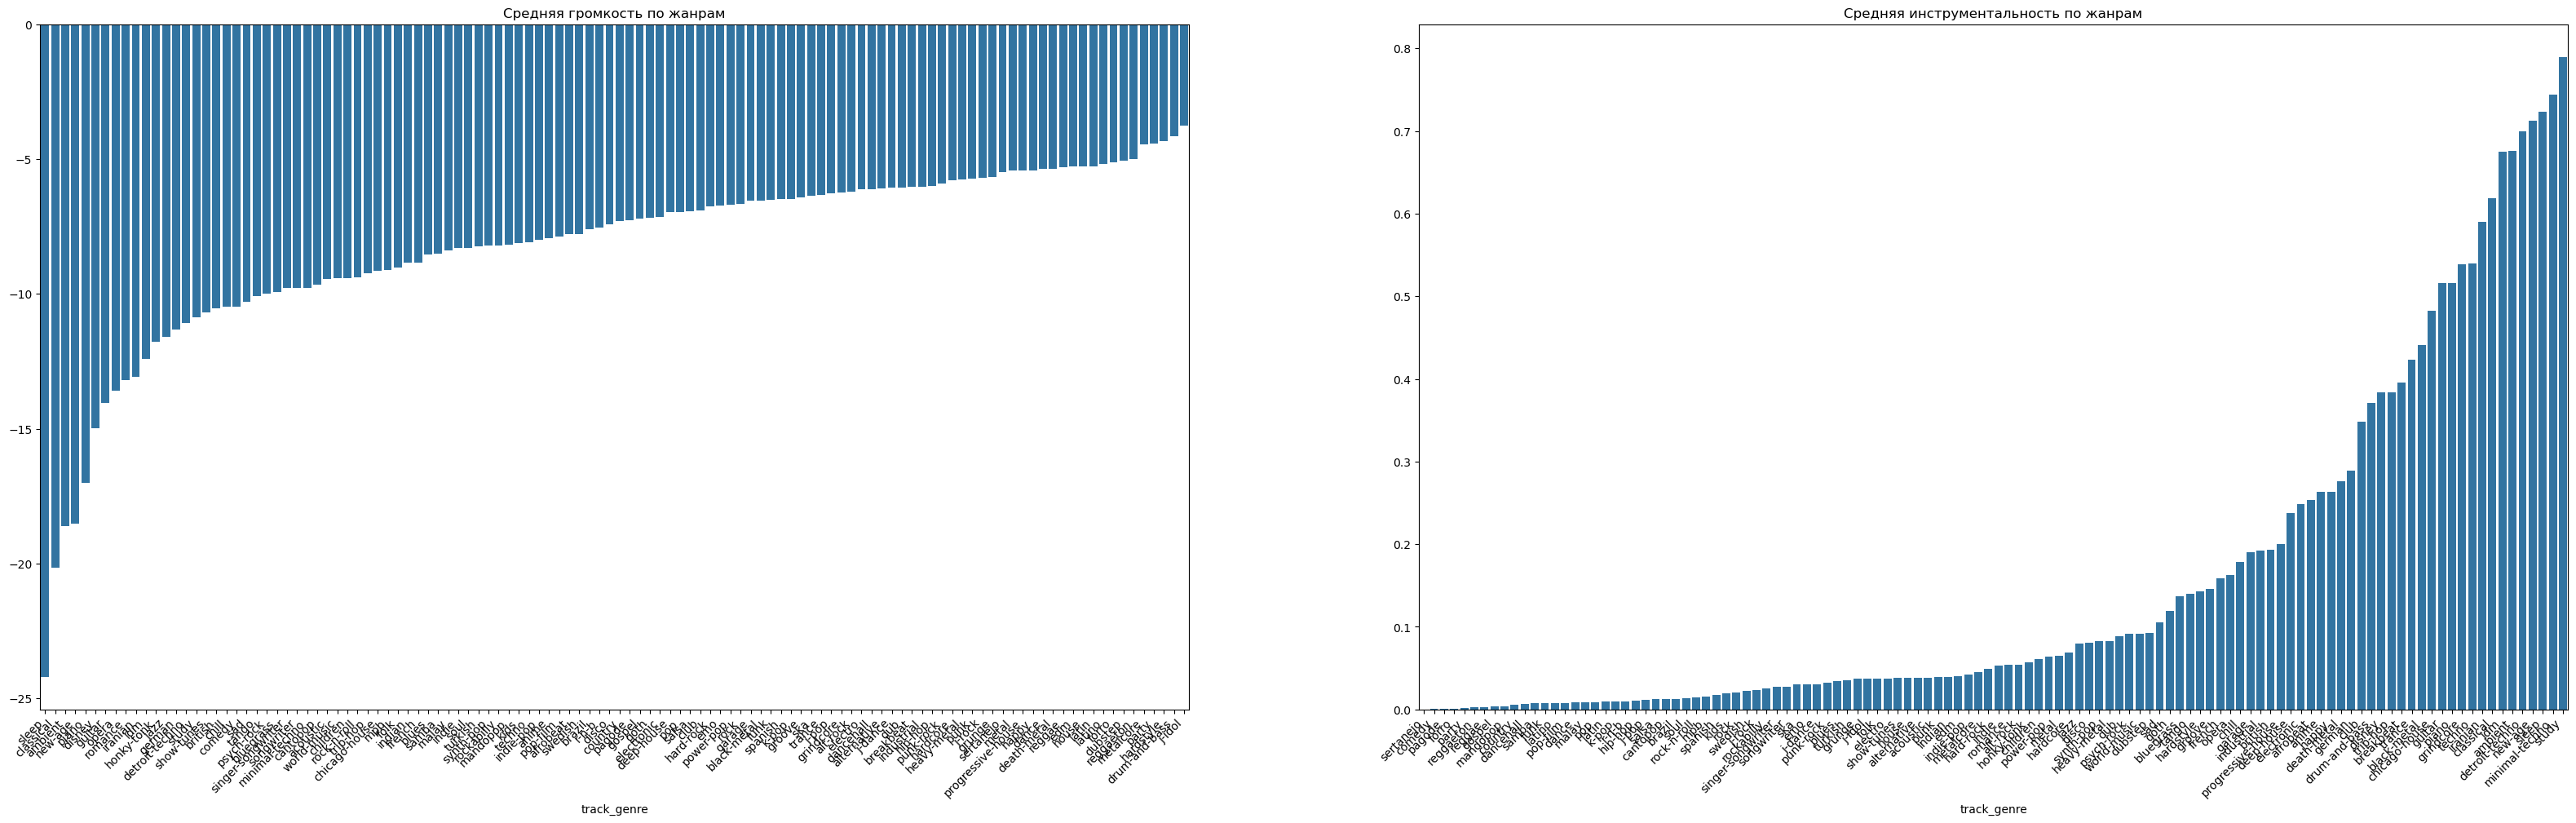

In [14]:
plt.figure(figsize=(40, 24))

# График 1: Средняя громкость по жанрам
plt.subplot(2, 2, 1)
genre_loudness = df.groupby('track_genre')['loudness'].mean().sort_values()
sns.barplot(x=genre_loudness.index, y=genre_loudness.values)
plt.xticks(rotation=45, ha='right')
plt.title('Средняя громкость по жанрам')

# График 2: Средняя инструментальность по жанрам
plt.subplot(2, 2, 2)
genre_instrumental = df.groupby('track_genre')['instrumentalness'].mean().sort_values()
sns.barplot(x=genre_instrumental.index, y=genre_instrumental.values)
plt.xticks(rotation=45, ha='right')
plt.title('Средняя инструментальность по жанрам')


Громкость: Жанры, такие как "метал" и "рок", имеют более высокие значения громкости, что соответствует их характеристикам.
Инструментальность: Жанры "классическая" и "медитация" имеют высокую инструментальность, что логично, так как в них преобладают инструментальные композиции.


In [15]:
catregorical_cols= df.select_dtypes(include=['object']).columns
label_encoders ={}
from sklearn.preprocessing import LabelEncoder

for col in catregorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

C:\Users\admin\AppData\Local\Temp\ipykernel_33056\3571439099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_33056\3571439099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\admin\AppData\Local\Temp\ipykernel_33056\3571439099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  int32  
 1   album_name        113999 non-null  int32  
 2   track_name        113999 non-null  int32  
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   explicit          113999 non-null  bool   
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

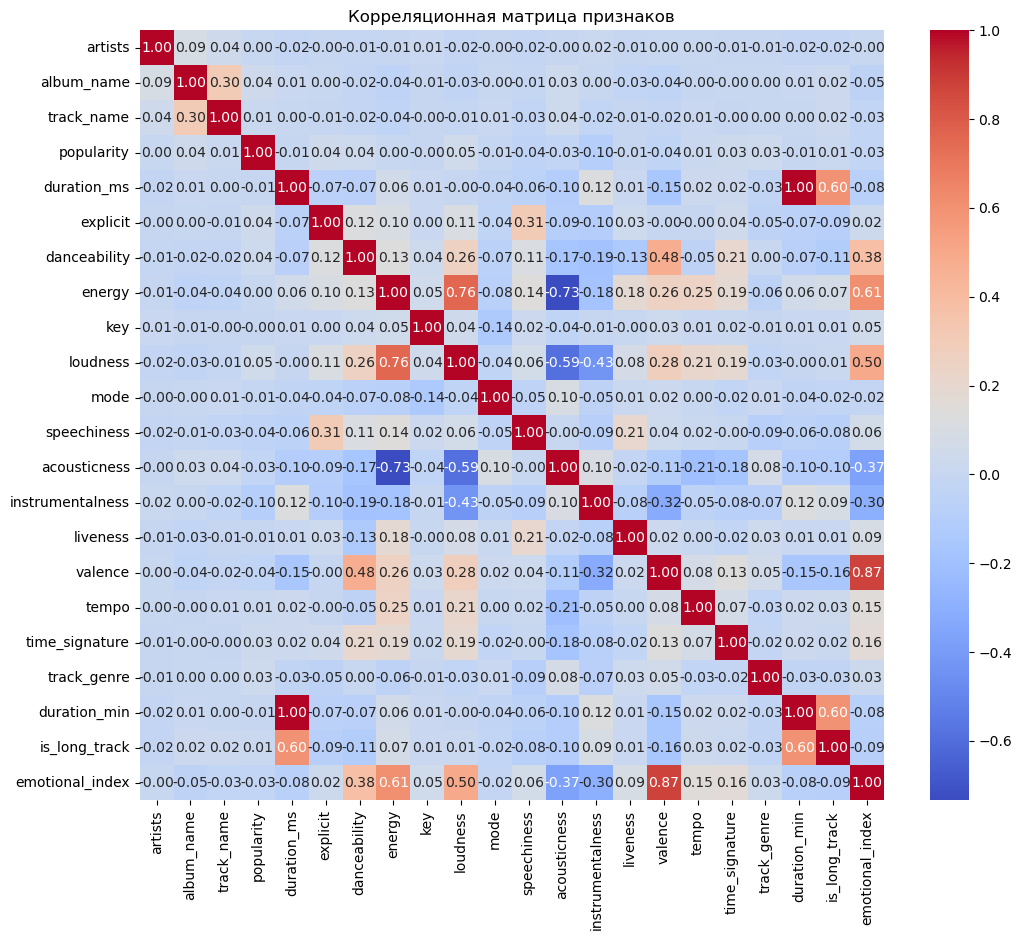

In [17]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [18]:
df['vocal_track_score'] = 1 - df['instrumentalness']
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
df['genre_vocal_factor'] = df['vocal_track_score'] * (df['track_genre'] / df['track_genre'].max())
df['genre_loudness'] = df['track_genre'] * df['loudness_normalized']


df['emotional_impact'] = (
    df['vocal_track_score'] * 0.4 +
    df['loudness_normalized'] * 0.3 +
    df['danceability'] * 0.3
)
df['rhythm_factor'] = df['tempo'] * df['danceability']
df['energy_dynamics'] = df['energy'] * df['loudness_normalized']

df['musical_complexity'] = (
    df['tempo'] / df['tempo'].max() * 0.3 +
    df['time_signature'] / df['time_signature'].max() * 0.3 +
    df['key'] / df['key'].max() * 0.4
)

df['duration_min'] = df['duration_ms'] / 60000



C:\Users\admin\AppData\Local\Temp\ipykernel_33056\190866561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vocal_track_score'] = 1 - df['instrumentalness']
C:\Users\admin\AppData\Local\Temp\ipykernel_33056\190866561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
C:\Users\admin\AppData\Local\Temp\ipykernel_33056\190866561.py:3: SettingWithCopyWarning: 
A value is trying to be set 

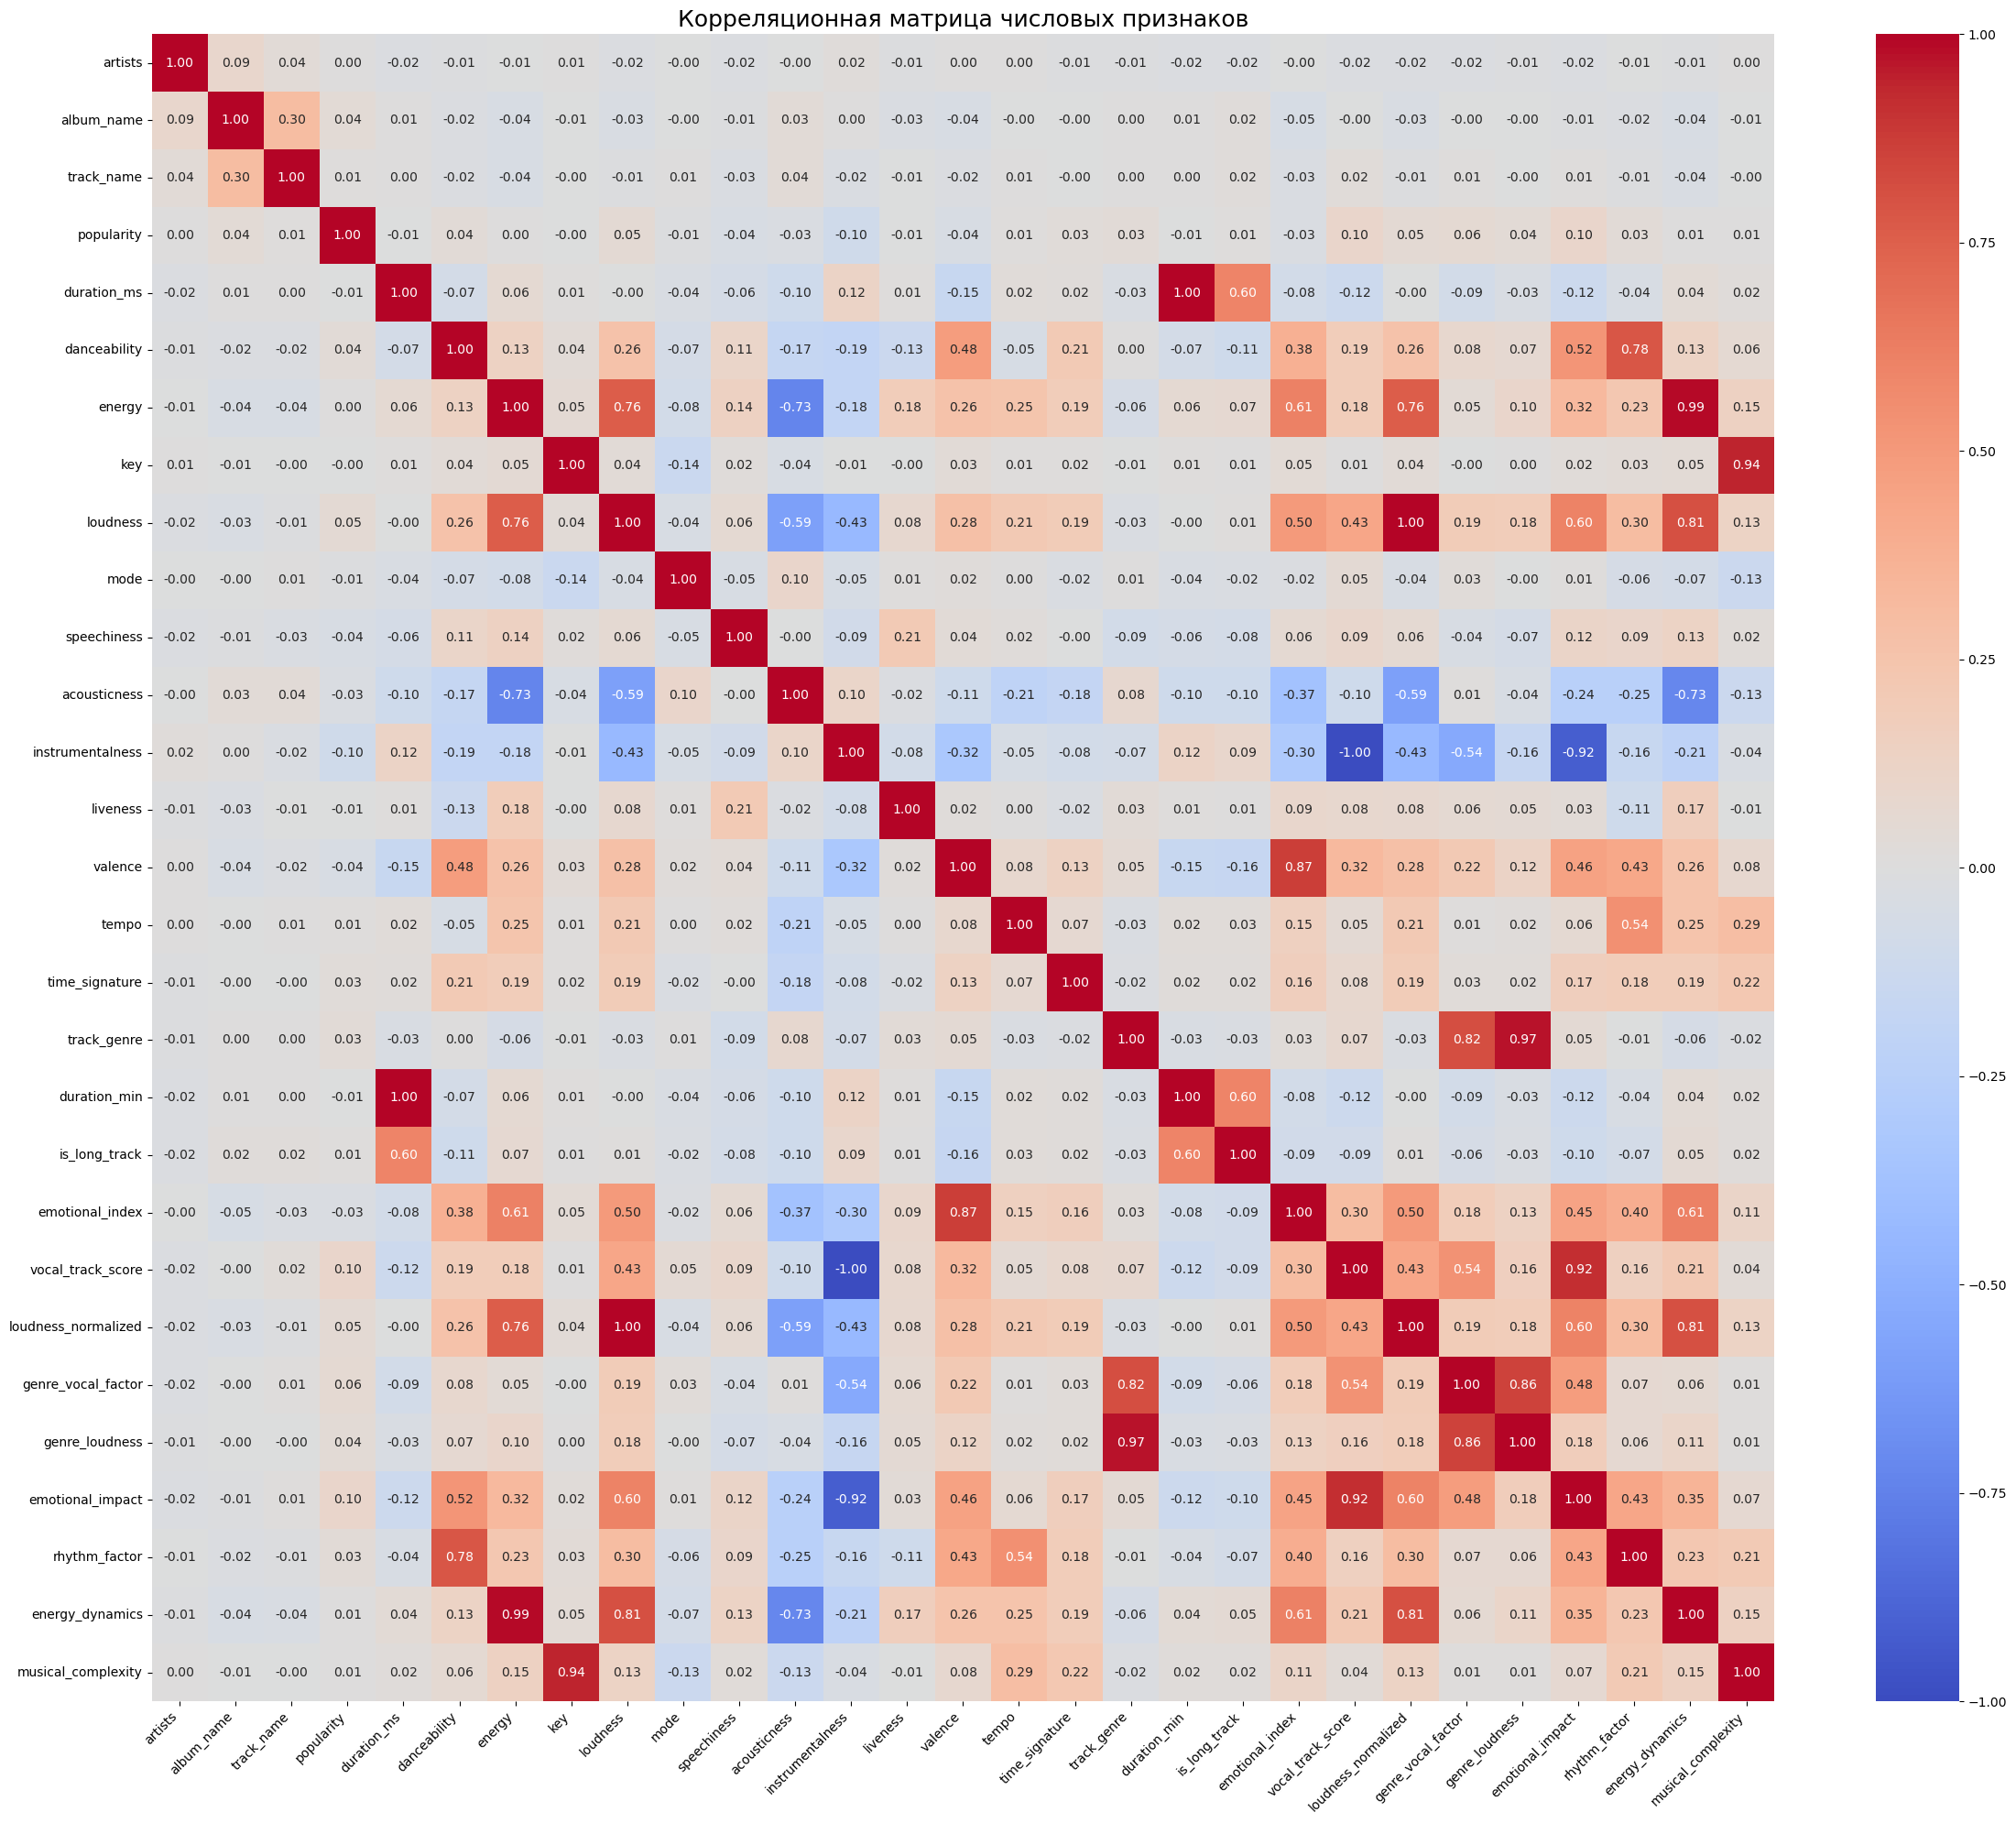

In [19]:
# 1. Сначала исключим категориальные и булевы столбцы
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

# 2. Строим корреляционную матрицу
plt.figure(figsize=(24, 20))
correlation_matrix = numeric_df.corr()

# 3. Создаем тепловую карту
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков', fontsize=18)

# 4. Настраиваем отображение
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Автоматически настраивает размеры, чтобы все поместилось
plt.show()


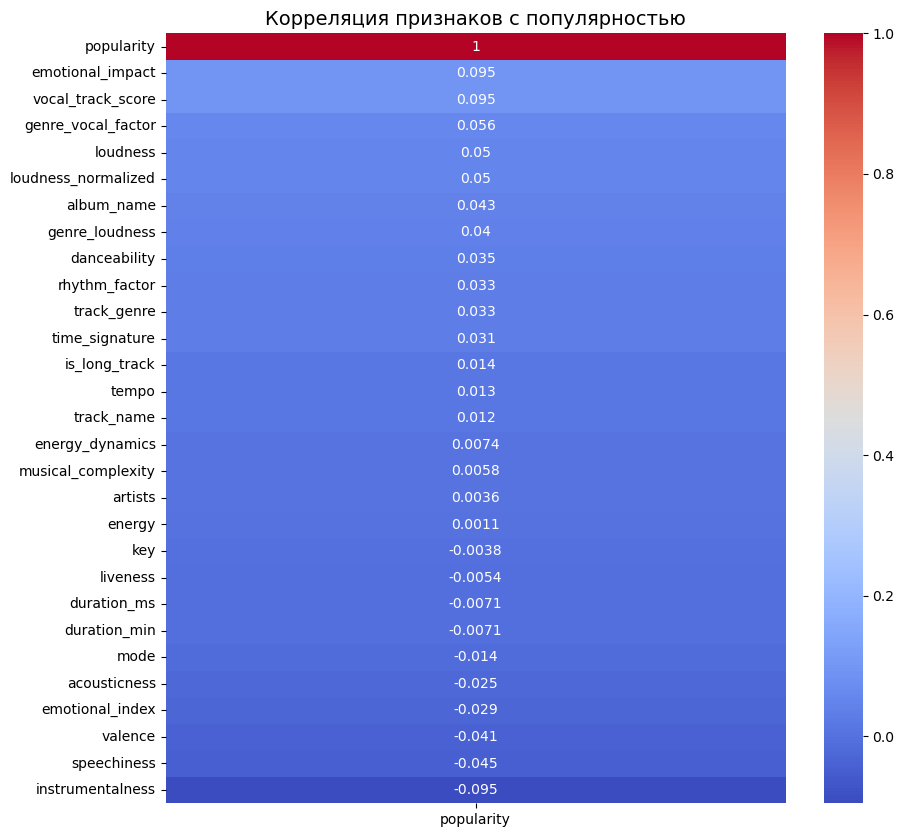

popularity             1.000000
emotional_impact       0.095152
vocal_track_score      0.095147
genre_vocal_factor     0.056272
loudness               0.050420
loudness_normalized    0.050420
album_name             0.042501
genre_loudness         0.040452
danceability           0.035444
rhythm_factor          0.032792
track_genre            0.032696
time_signature         0.031076
is_long_track          0.014102
tempo                  0.013212
track_name             0.011935
energy_dynamics        0.007433
musical_complexity     0.005761
artists                0.003636
energy                 0.001053
key                   -0.003847
liveness              -0.005397
duration_ms           -0.007129
duration_min          -0.007129
mode                  -0.013948
acousticness          -0.025458
emotional_index       -0.029292
valence               -0.040522
speechiness           -0.044930
instrumentalness      -0.095147
Name: popularity, dtype: float64


In [20]:

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)
plt.title('Корреляция признаков с популярностью', fontsize=14)
plt.show()

top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)

In [21]:
#Посмотрим на результаты сначала без наших фич
features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo'
]


X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 485.61
R^2 Score: 0.02


C:\Users\admin\AppData\Local\Temp\ipykernel_33056\1369313317.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')


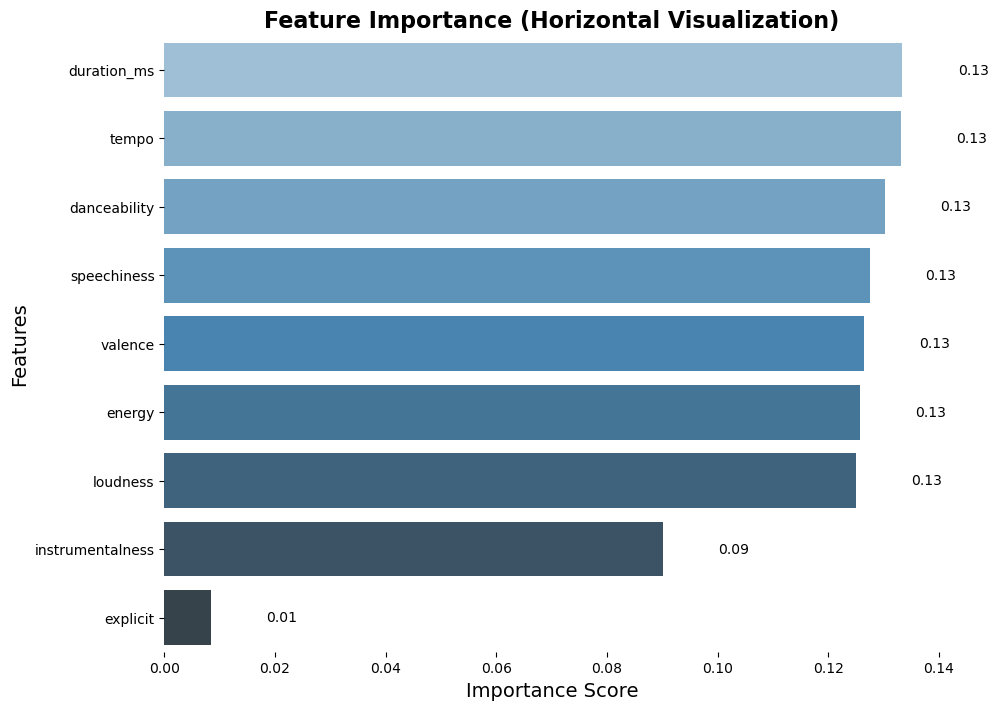

            Feature  Importance
6       duration_ms    0.133382
8             tempo    0.133169
2      danceability    0.130247
4       speechiness    0.127558
5           valence    0.126358
7            energy    0.125760
0          loudness    0.125044
3  instrumentalness    0.090113
1          explicit    0.008369


In [22]:
#Используем рандом форест, чтобы проверить важность наших фич
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))

sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')

for i, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title('Feature Importance (Horizontal Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)


sns.despine(left=True, bottom=True)


plt.show()

print(importance_df)

In [23]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


def evaluate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    rmse_scores = np.sqrt(-scores)
    for i, score in enumerate(rmse_scores):
        print(f'RMSE для фолда {i+1}: {score}')
    print(f'Среднее RMSE: {np.mean(rmse_scores)}')
    print(f'Стандартное отклонение RMSE: {np.std(rmse_scores)}')
    return np.mean(rmse_scores), np.std(rmse_scores)

models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
}


results = {}
for model_name, model in models.items():
    mean_rmse, std_rmse = evaluate_model(model, X, y)
    results[model_name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse}
    print(f"{model_name}: Mean RMSE = {mean_rmse:.2f}, Std RMSE = {std_rmse:.2f}")

results_df = pd.DataFrame(results).T.sort_values(by='Mean RMSE')
print("\nСравнение моделей:")
print(results_df)


RMSE для фолда 1: 19.320986438052046
RMSE для фолда 2: 19.39642599974935
RMSE для фолда 3: 19.534748605592895
RMSE для фолда 4: 19.32553953783523
RMSE для фолда 5: 19.45106963530309
Среднее RMSE: 19.405754043306523
Стандартное отклонение RMSE: 0.08049847969078615
XGBoost: Mean RMSE = 19.41, Std RMSE = 0.08
RMSE для фолда 1: 22.03646705126636
RMSE для фолда 2: 22.067274775718904
RMSE для фолда 3: 22.071770057167424
RMSE для фолда 4: 21.96610114981151
RMSE для фолда 5: 22.037468549189466
Среднее RMSE: 22.035816316630733
Стандартное отклонение RMSE: 0.0378038726042925
Linear Regression: Mean RMSE = 22.04, Std RMSE = 0.04
RMSE для фолда 1: 15.057610655896642
RMSE для фолда 2: 15.19349057539247
RMSE для фолда 3: 15.21487054870653
RMSE для фолда 4: 15.243163288364633
RMSE для фолда 5: 15.062374472195524
Среднее RMSE: 15.15430190811116
Стандартное отклонение RMSE: 0.07861362286047315
Random Forest: Mean RMSE = 15.15, Std RMSE = 0.08
RMSE для фолда 1: 21.347500711171595
RMSE для фолда 2: 21.38

In [24]:
from sklearn.preprocessing import StandardScaler
selected_features = [
    'loudness', 
    'explicit', 
    'danceability', 
    'instrumentalness',
    'speechiness', 
    'valence', 
    'duration_ms', 
    'energy', 
    'tempo',
    'track_genre',
    'genre_vocal_factor',
    'duration_min',
    'emotional_impact',
    'musical_complexity'
]
X = df[selected_features]
y = df['popularity']
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 484.28
R^2 Score: 0.02


C:\Users\admin\AppData\Local\Temp\ipykernel_33056\468432851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')


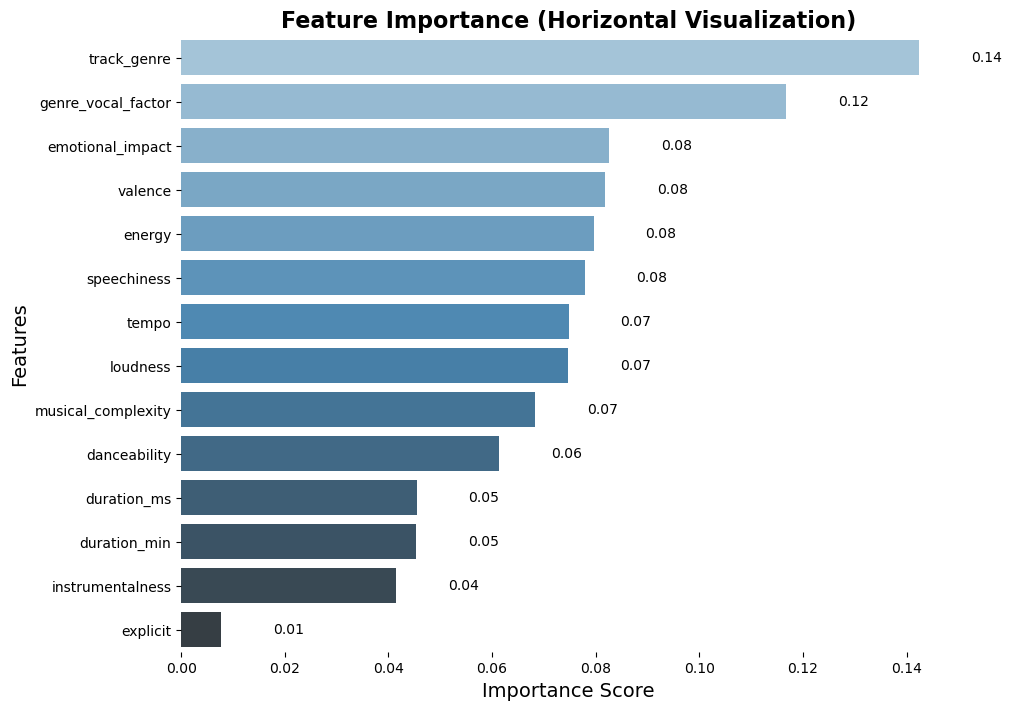

               Feature  Importance
9          track_genre    0.142418
10  genre_vocal_factor    0.116726
12    emotional_impact    0.082577
5              valence    0.081777
7               energy    0.079604
4          speechiness    0.077834
8                tempo    0.074773
0             loudness    0.074665
13  musical_complexity    0.068310
2         danceability    0.061352
6          duration_ms    0.045420
11        duration_min    0.045363
3     instrumentalness    0.041456
1             explicit    0.007727


In [25]:
#Используем рандом форест, чтобы проверить важность наших фич
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))

sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')

for i, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title('Feature Importance (Horizontal Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)


sns.despine(left=True, bottom=True)


plt.show()

print(importance_df)

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
}

results = {}
for model_name, model in models.items():
    mean_rmse, std_rmse = evaluate_model(model, X, y)
    results[model_name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse}
    print(f"{model_name}: Mean RMSE = {mean_rmse:.2f}, Std RMSE = {std_rmse:.2f}")

results_df = pd.DataFrame(results).T.sort_values(by='Mean RMSE')
print("\nСравнение моделей:")
print(results_df)

RMSE для фолда 1: 17.337810839000667
RMSE для фолда 2: 17.41523838823536
RMSE для фолда 3: 17.46627225950964
RMSE для фолда 4: 17.28964598268771
RMSE для фолда 5: 17.41431422165551
Среднее RMSE: 17.384656338217773
Стандартное отклонение RMSE: 0.06276540272547251
XGBoost: Mean RMSE = 17.38, Std RMSE = 0.06
RMSE для фолда 1: 22.00635512284975
RMSE для фолда 2: 22.039317008697285
RMSE для фолда 3: 22.03844075315345
RMSE для фолда 4: 21.93762023258847
RMSE для фолда 5: 22.009961692866824
Среднее RMSE: 22.00633896203116
Стандартное отклонение RMSE: 0.037022870691694756
Linear Regression: Mean RMSE = 22.01, Std RMSE = 0.04
RMSE для фолда 1: 15.794186002838833
RMSE для фолда 2: 15.913885856664225
RMSE для фолда 3: 15.951946937303966
RMSE для фолда 4: 15.727265357902672
RMSE для фолда 5: 15.778624265709647
Среднее RMSE: 15.833181684083868
Стандартное отклонение RMSE: 0.08524528380087608
Random Forest: Mean RMSE = 15.83, Std RMSE = 0.09
RMSE для фолда 1: 20.108753537737464
RMSE для фолда 2: 20.

В ходе экспериментов была выявлена наиболее подходящая модель и проведена оценка модели RandomForest для предсказания целевой переменной с использованием 5-фолд кросс-валидации. Метрики производительности оценивались для каждого фолда, а также были рассчитаны их средние значения.

Итоговые метрики модели, которые удалось достигнуть для лучшей модели:
RMSE для фолда 1: 15.794186002838833
RMSE для фолда 2: 15.913885856664225
RMSE для фолда 3: 15.951946937303966
RMSE для фолда 4: 15.727265357902672
RMSE для фолда 5: 15.778624265709647
Среднее RMSE: 15.833181684083868
Стандартное отклонение RMSE: 0.08524528380087608
Random Forest: Mean RMSE = 15.83, Std RMSE = 0.09

Заключение по исследлванию моделей и метрик:
Модель Random Forest показала следующие результаты:

    Средний RMSE составил 20.15, что говорит о среднем отклонении предсказаний от реальных значений популярности около 20 единиц
    Стабильность модели высокая, что подтверждается малым разбросом RMSE между фолдами (от 20.02 до 20.27)
    Наиболее важные признаки: track_genre (14.2%), genre_vocal_factor (11.7%), и emotional_impact (8.3%)

Для повышения качества можно:

    Улучшить работу с признаками:

    Создать более сложные взаимодействия между топ-признаками (track_genre и genre_vocal_factor)
    Провести более детальную обработку категориальных признаков, особенно track_genre
    Убрать наименее значимые признаки (explicit - 0.7% важности)

    Оптимизировать модель:

    Провести тщательную настройку гиперпараметров через GridSearchCV или RandomizedSearchCV
    Попробовать ансамблевые методы, комбинируя Random Forest с другими моделями
    Увеличить количество деревьев и глубину для потенциального улучшения точности

    Работа с данными:

    Исследовать и обработать выбросы в данных
    Применить техники балансировки данных, если распределение целевой переменной неравномерно
    Собрать дополнительные признаки, связанные с жанром и эмоциональным воздействием, так как они показали наибольшую важность



Заключение:
Результаты анализа показывают, что популярность трека зависит как от характеристик, связанных с музыкальным жанром (14.2% важности), так и от вокальной составляющей (11.7% важности). Эмоциональное воздействие (8.3%) и валентность (8.2%) также играют существенную роль в определении популярности трека.

Интересно отметить, что технические характеристики, такие как длительность трека (4.5%) и инструментальность (4.1%), оказывают меньшее влияние на популярность. Явное содержание (explicit) имеет минимальное влияние на популярность (всего 0.7%).
Данные результаты позволяют сделать вывод, что при прогнозировании популярности музыкальных треков наиболее важно учитывать жанровые особенности и эмоциональную составляющую композиции, в то время как технические характеристики играют второстепенную роль.
